In [1]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
num_classes = 10
epochs = 10

X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [7]:
cnn = Sequential()

In [8]:
cnn.add(Conv2D(32, kernel_size= (5,5), input_shape = (28,28,1), padding = 'same', activation = 'relu'))

In [10]:
cnn.add(MaxPooling2D())

In [11]:
cnn.add(Conv2D(64, kernel_size= (5,5), padding = 'same', activation = 'relu'))

In [12]:
cnn.add(MaxPooling2D())

In [13]:
cnn.add(Flatten())

In [14]:
cnn.add(Dense(1024, activation = 'relu'))

In [15]:
cnn.add(Dense(10, activation = 'softmax'))

In [16]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [20]:
history = cnn.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0971 - accuracy: 0.9706 - val_loss: 0.0326 - val_accuracy: 0.9900
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0256 - val_accuracy: 0.9921
Epoch 4/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0295 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0409 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0469 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0

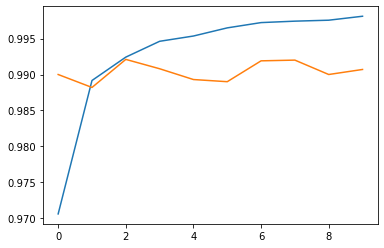

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

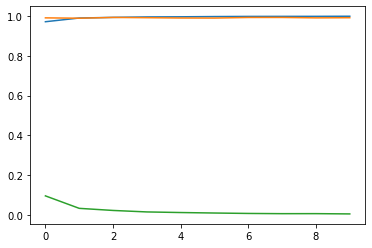

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [24]:
score = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0520 - accuracy: 0.9907


In [ ]:
score